
# Sentiment Analysis of Trump's tweets

- <a href =#1> 1. Importing libraries  </a>
- <a href =#2> 2. Text Edit Functions </a>
- <a href =#3> 3. Text Cleaning </a>
- <a href =#4> 4. Sentiment Breakdown </a>
- <a href =#5> 5. Positive Sentiment </a>
- <a href =#6> 6. Negative Sentiment</a>
- <a href =#7> 7. Neutral Sentiment</a>
- <a href =#8> 8. Unique Words  </a>
- <a href =#9> 9. Word Cloud </a>
    - <a href =#9.1> 9.1. Neutral Word Cloud</a>
    - <a href =#9.2> 9.2. Positive Word Cloud </a>
    - <a href =#9.3> 9.3. Negative Word Cloud </a>

<br><br>

<div id=1><h2>1. Libraries</h2> </div

In [ ]:

import re
import emoji

import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as xp
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div id=2><h2>2. Text Edit Functions</h2> </div>

In [18]:
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)
def edits1(word):
    letters='abcdefghijklmnopqrstuvwxyz'
    splits=[(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes=[L+R[1:] for L,R in splits if R]
    transposes=[L+R[1] +R[0] + R[2:] for L,R in splits if len(R)>1]
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]
    inserts = [L+c+ R for L,R in splits for c in letters]
    return set(deletes+transposes+replaces+inserts)
def edits2(word):
    return(e2 for e1 in edits1(word) for e2 in edits1(e1))
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x
nltk.LancasterStemmer

ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    words_stem = [ls.stem(w) for w in words]
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem
def convert_emojis(text):
    for emot in emoji.UNICODE_EMOJI:
        text = re.sub(r'('+emot+')', "_".join(emoji.UNICODE_EMOJI[emot].replace(",","").replace(":","").split()), text)
    return text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text
def tokenise(text):
    words = word_tokenize(text) 
    return words
blacklist = ['http','https','www','com', 'ev','u','ly','pic','would']

def remove_words(text):
    text = [i for i in text if (i not in blacklist)]
    return text

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

<div id=3><h2>3. Text Cleaning</h2> </div>

In [19]:

train=pd.read_csv('/Users/ramonmartin/Documents/METIS/project 4/trumptweets.csv')
train=train.drop(['link','mentions','hashtags','geo'], axis=1)
train['content'] = train['content'].map(lambda x: re.sub(r'\W+', ' ', x))
train['content'] = train['content'].replace(r'\W+', ' ', regex=True)
train['content']=train['content'].apply(lambda x: mapping_replacer(x, contraction))
train['content'] = train['content'].apply(lambda x:clean_text(x))
train['content']=train['content'].apply(lambda x: remove_stopword(x))
train['content']=train['content'].apply(lambda x: lexicon_normalization(x))
train['content'] = train['content'].apply(lambda x: [i for i in x if i not in blacklist])
train['sentiment']=train['content'].apply(lambda x: get_tweet_sentiment(' '.join(x)))
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

Number of tweets with positive sentiment 15069
Number of tweets with negative sentiment 6756
Number of tweets with neutral sentiment 19297


<div id=4><h2>4. Sentiment Breakdown</h2> </div>

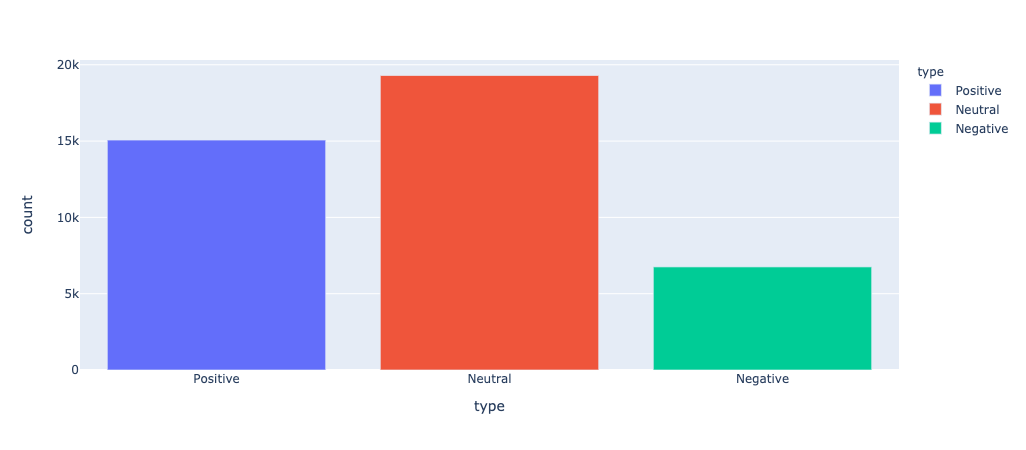

In [20]:
sent={'type':['Positive', "Neutral", "Negative"],"count":[15069, 19297, 6756]}

fig = xp.bar(sent, x="type", y="count", color="type")
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/sent_comp.png")

In [21]:
train["content"].to_csv(r'/Users/ramonmartin/Documents/METIS/Project 4/text_tweets.csv', index= False)

<div id=5><h2>5. Positive Sentiment</h2> </div> 

In [22]:
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(23))
temp_positive.columns = ['Common_words','count']
temp_positive['Common_words'] = temp_positive['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_positive['Common_words'] = temp_positive['Common_words'].replace(r'\W+', '', regex=True)
temp_positive['Common_words'] = temp_positive['Common_words'].apply(lambda x:remove_spaces(x))
temp_positive=temp_positive[~temp_positive['Common_words'].isin(['s','gre','“',' * '])] #new line removing meaningless words
mask1 = temp_positive.Common_words.str.contains('[a-zA-Z]')
mask2 = temp_positive.Common_words.notna()
temp_positive = temp_positive[mask1 | mask2]
temp_positive.Common_words =  temp_positive.Common_words.str.replace(r"\s+", "").replace("", np.NaN)
temp_positive=temp_positive.dropna()


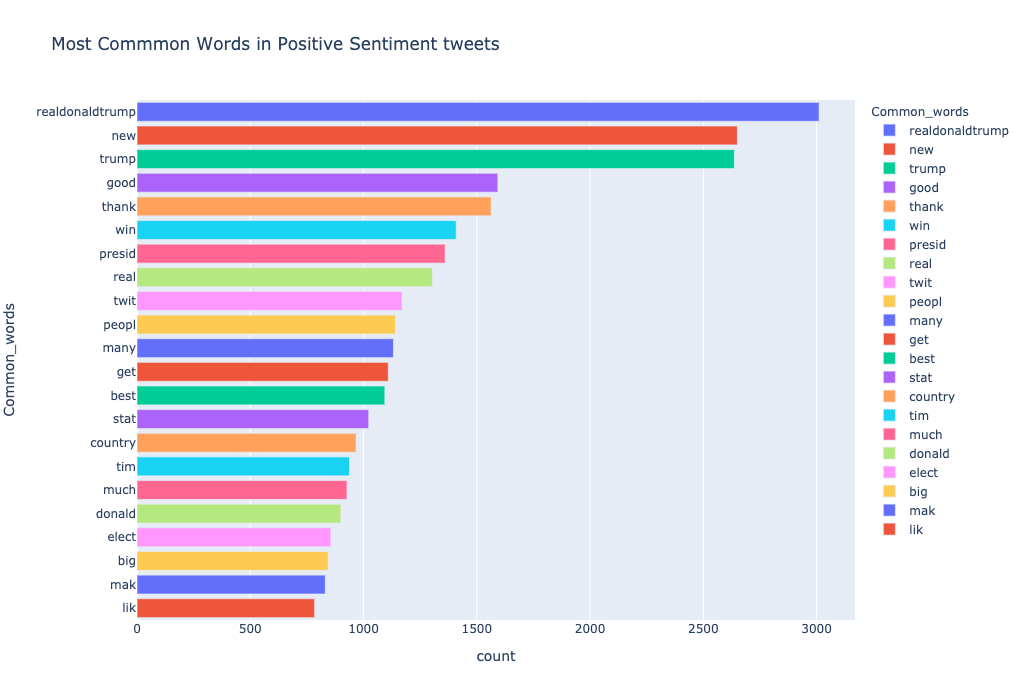

In [23]:
fig = xp.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Positive Sentiment tweets', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/pos_com_sent.png")

<div id=6><h2>6. Negative Sentiment</h2> </div> 

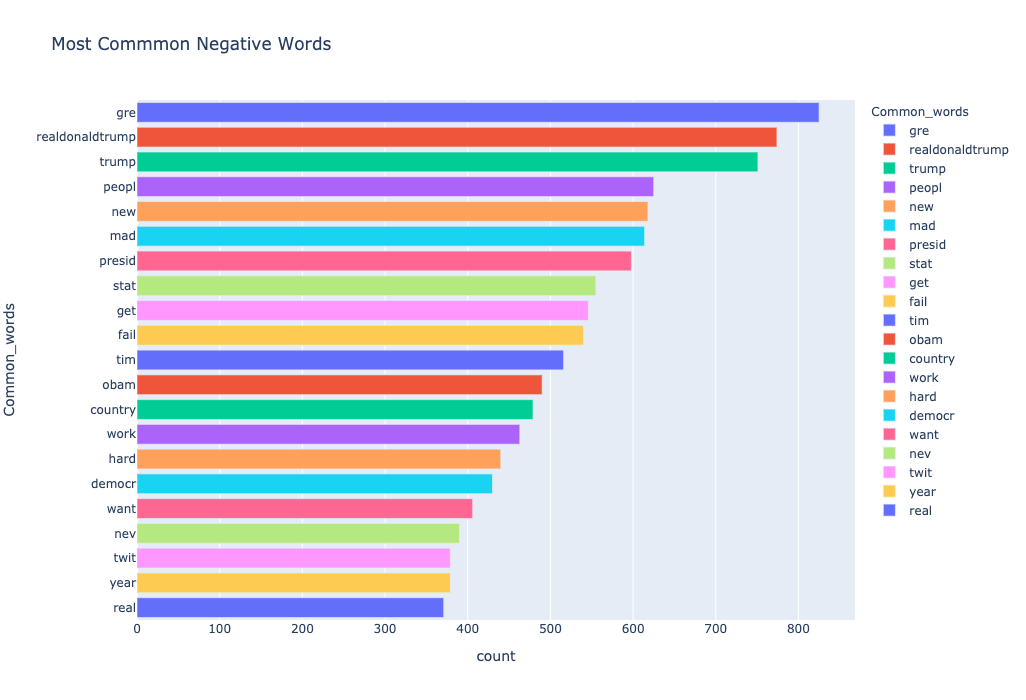

In [24]:
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(22))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']

#Data cleaning
temp_negative['Common_words'] = temp_negative['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_negative['Common_words'] = temp_negative['Common_words'].replace(r'\W+', '', regex=True)
temp_negative=temp_negative[~temp_negative['Common_words'].isin(['s','t'])] #new line removing meaningless words from above
mask1 = temp_negative.Common_words.str.contains('[a-zA-Z]')
mask2 = temp_negative.Common_words.notna()
temp_negative = temp_negative[mask1 | mask2]

temp_negative.Common_words =  temp_negative.Common_words.replace("", np.nan)
temp_negative = temp_negative.dropna(subset=['Common_words'])
fig = xp.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/neg_com_sent.png")

<div id=7><h2>7. Neutral Sentiment</h2> </div> 

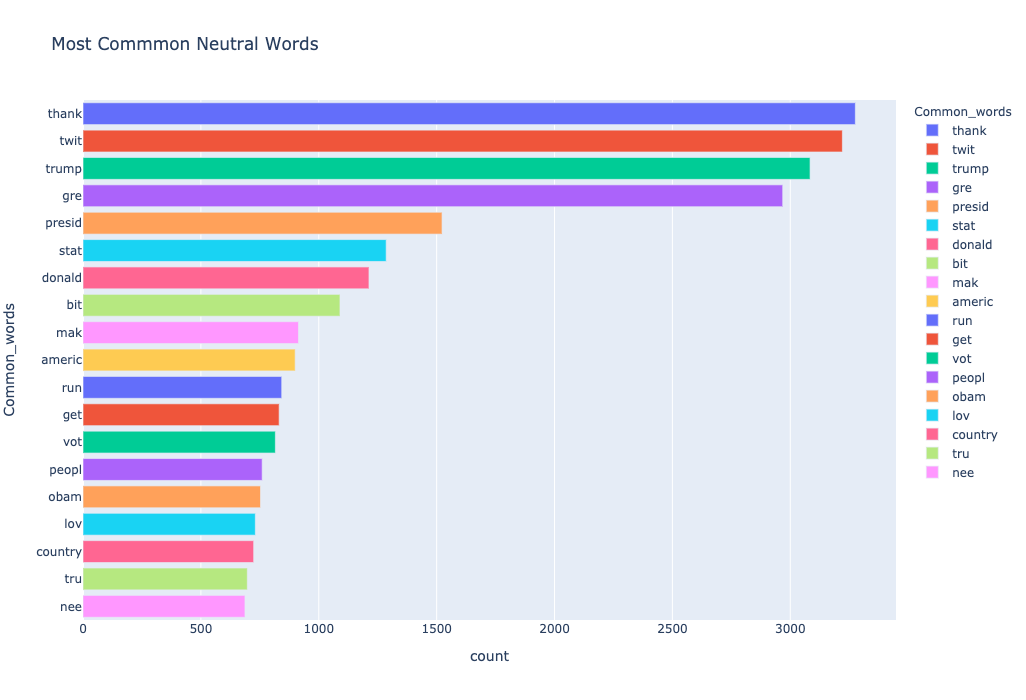

In [25]:
top = Counter([item for sublist in Neutral_sent['content'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']

#Data cleaning
temp_neutral['Common_words'] = temp_neutral['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_neutral['Common_words'] = temp_neutral['Common_words'].replace(r'\W+', '', regex=True)
temp_neutral=temp_neutral[~temp_neutral['Common_words'].isin(['s'])] #new line removing meaningless words from above

temp_neutral.Common_words =  temp_neutral.Common_words.replace("", np.nan)
temp_neutral = temp_neutral.dropna(subset=['Common_words'])
fig = xp.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/neut_com_sent.png")

<div id=8><h2>8. Top Unique Words by Sentiment</h2> </div> 

In [26]:
raw_text = [word for word_list in train['content'] for word in word_list]
def words_unique(sentiment,numwords,raw_words):

    allother = []
    for item in train[train.sentiment != sentiment]['content']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['content']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words
Unique_Neutral= words_unique('neutral', 10, raw_text)
Unique_Positive= words_unique('positive', 10, raw_text)
Unique_Negative= words_unique('negative', 10, raw_text)

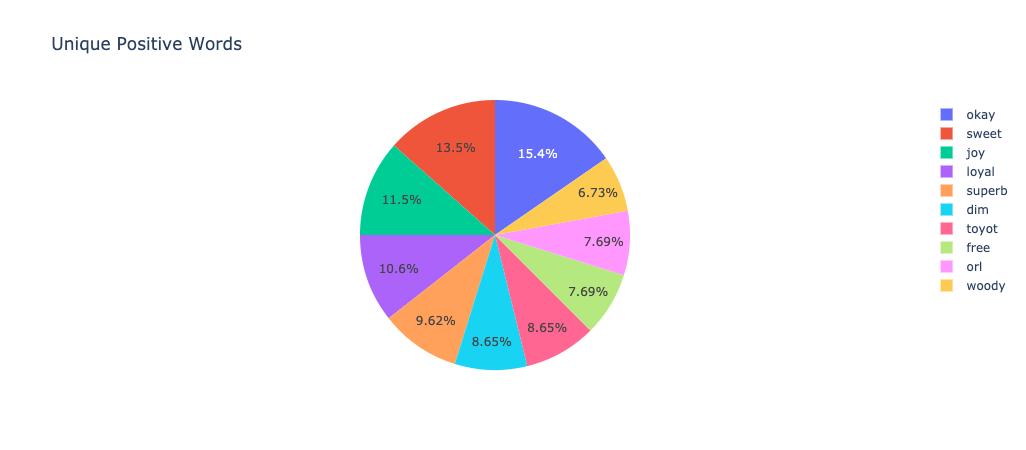

In [27]:

fig = xp.pie(Unique_Positive, values='count', names='words', title='Unique Positive Words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/pos_donut.png")

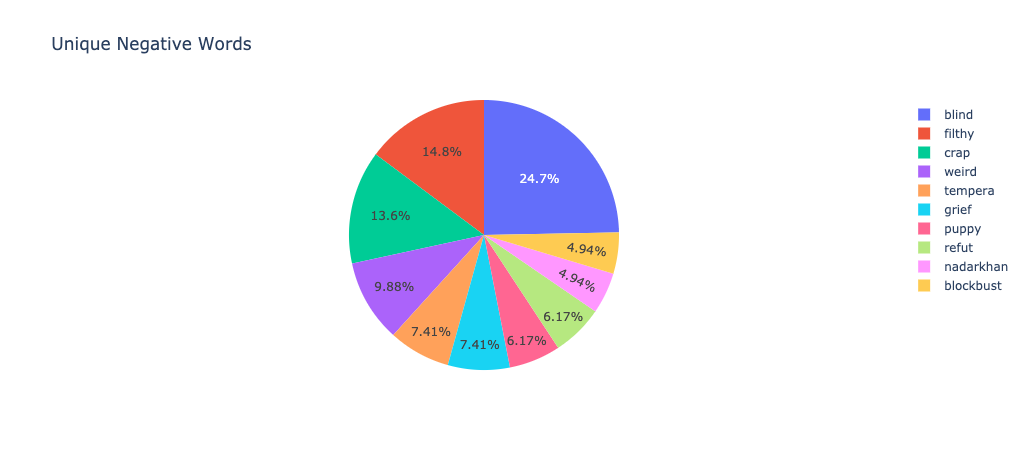

In [28]:

fig = xp.pie(Unique_Negative, values='count', names='words', title='Unique Negative Words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/neg_donut.png")

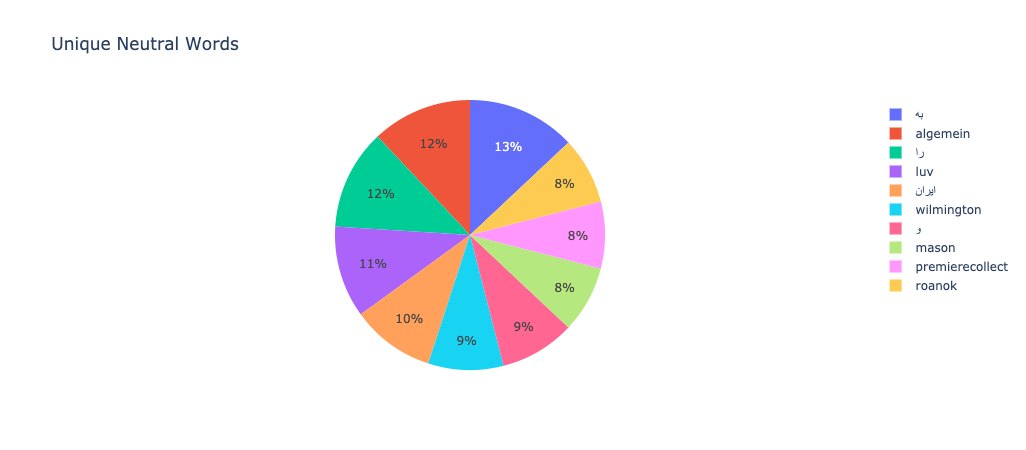

In [29]:

fig = xp.pie(Unique_Neutral, values='count', names='words', title='Unique Neutral Words')
fig.show()
fig.write_image("/Users/ramonmartin/Documents/METIS/project 4/neut_donut.png")

<div id=9><h2>9. Word Cloud</h2> </div> 

In [30]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(60,40), color = 'black',
                   title = None, title_size=40, image_color=False):
    
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/Users/ramonmartin/Documents/METIS/project 4/'

<div id=9.1><h2>9.1 Neutral Word Cloud</h2> </div> 

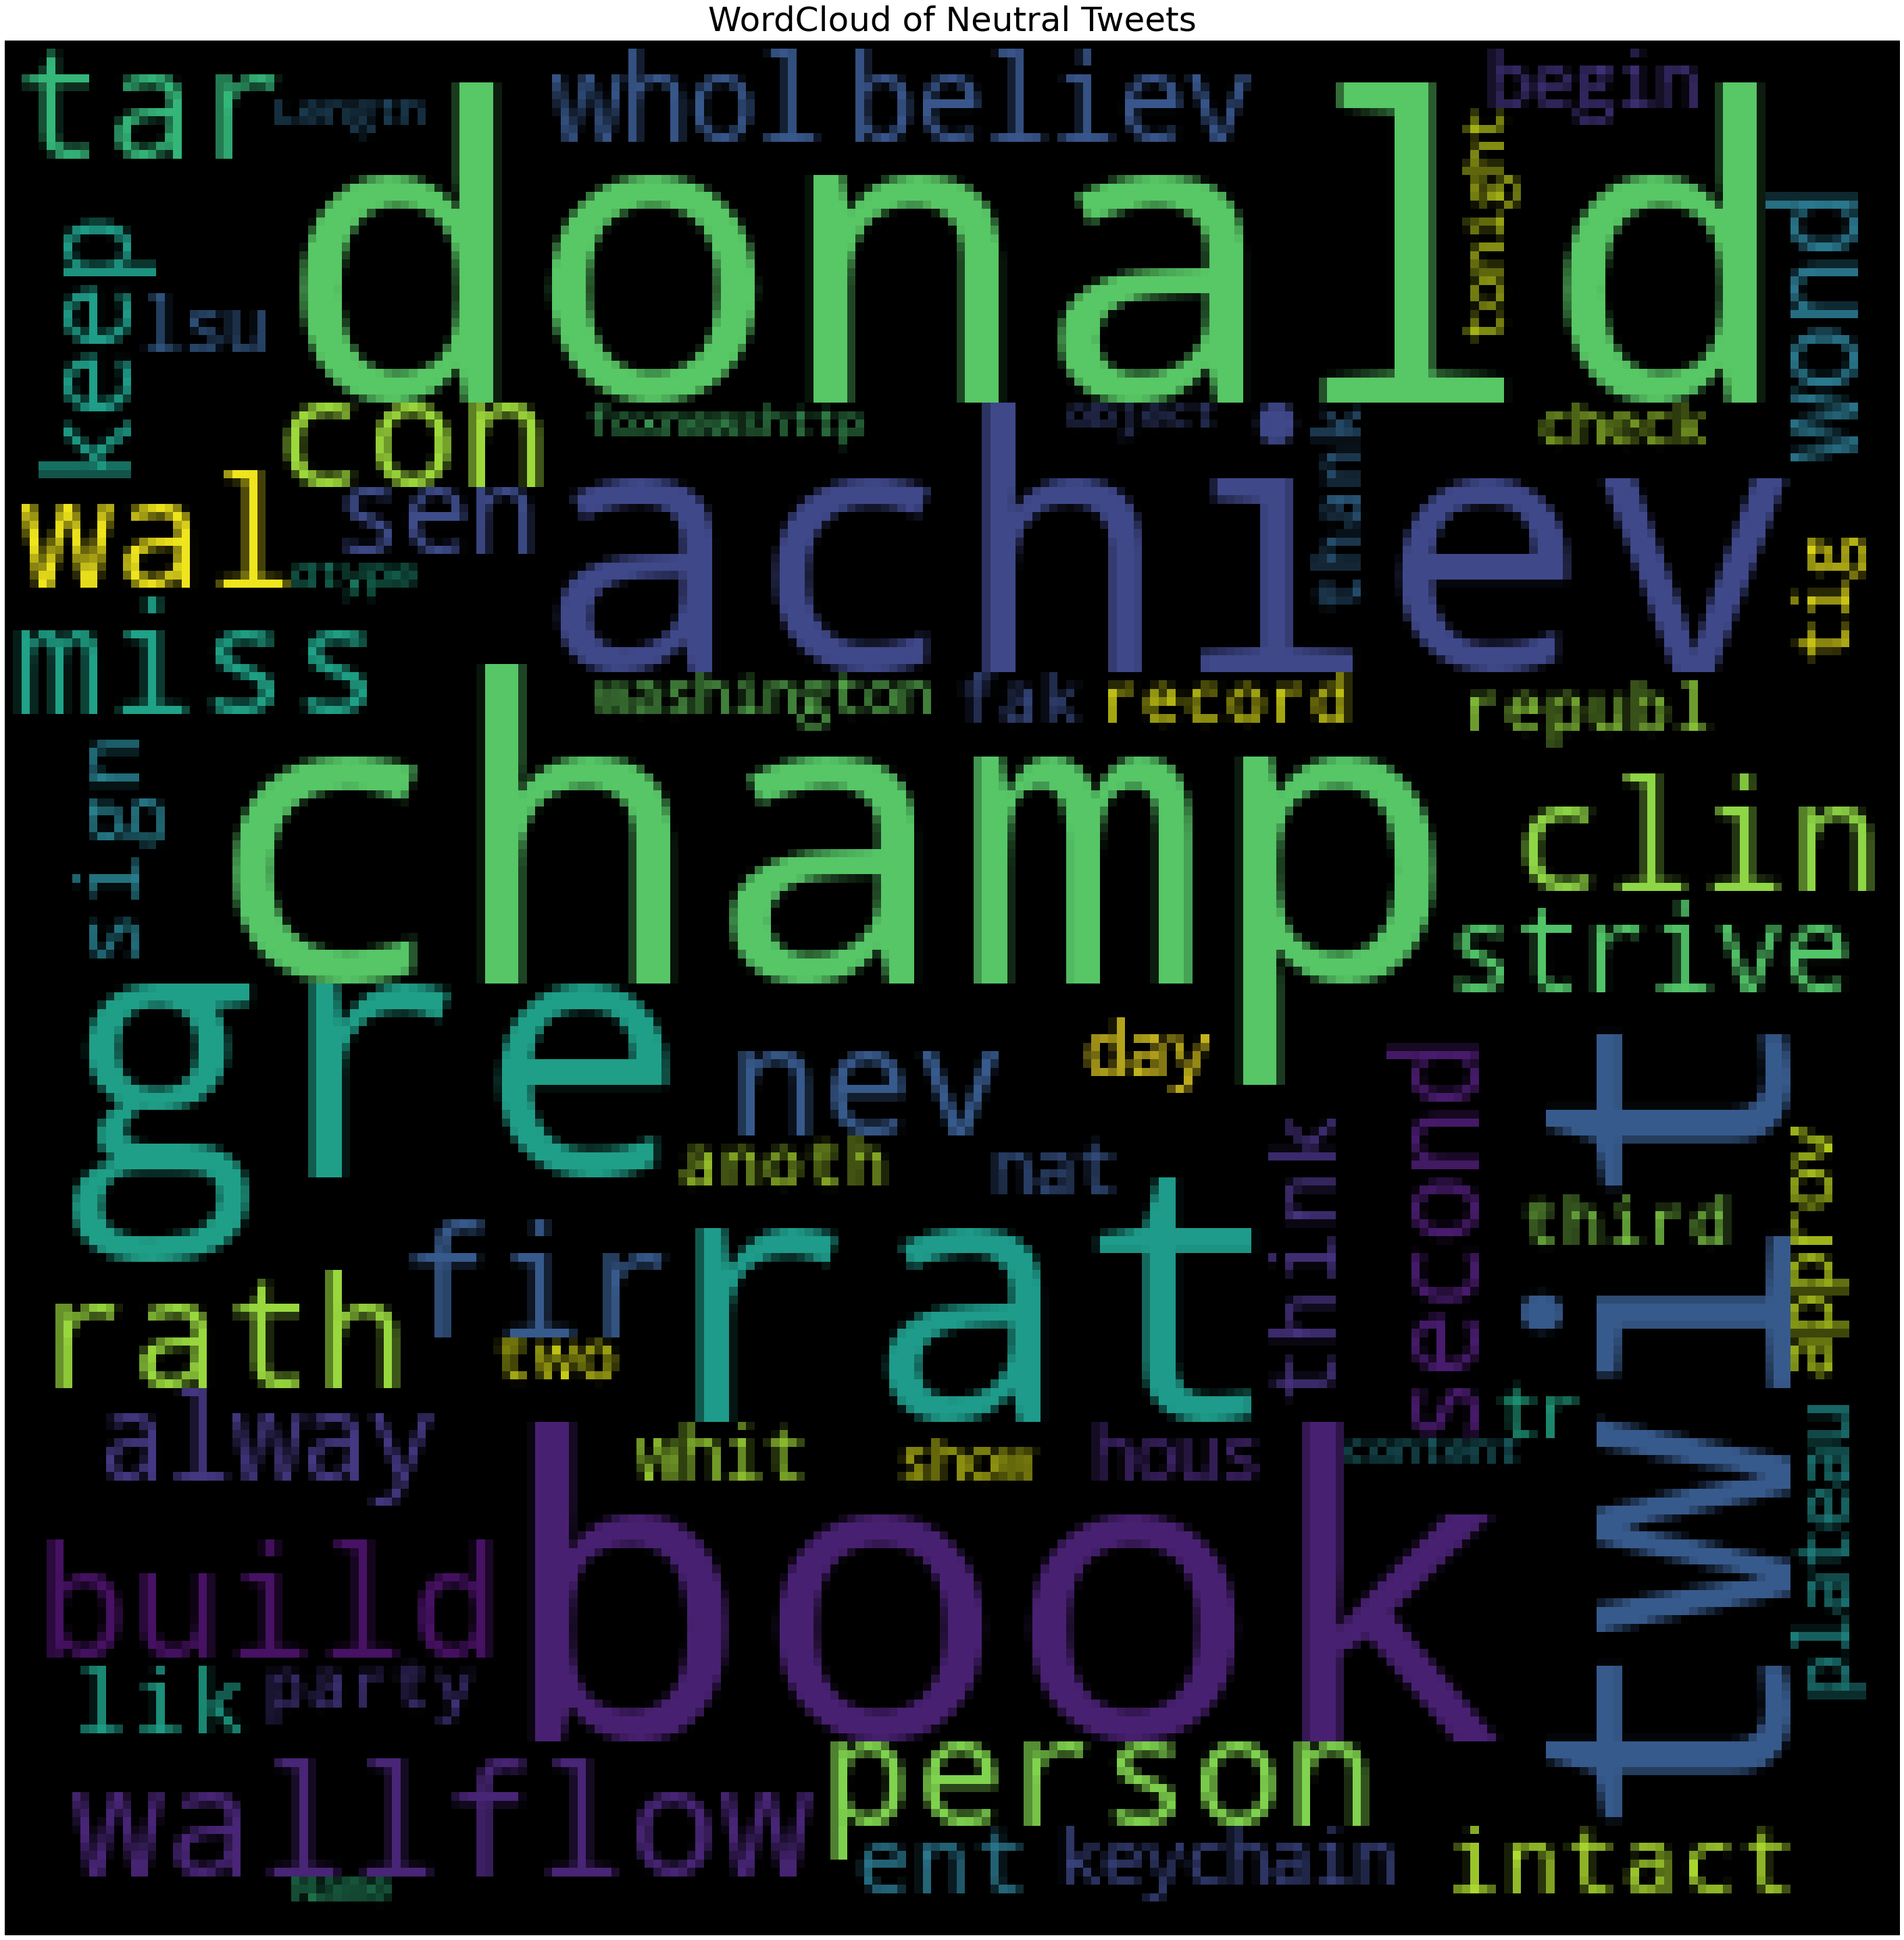

In [31]:
pos_mask = np.array(Image.open('/Users/ramonmartin/Documents/METIS/project 4/tweet_mask.png'))
plot_wordcloud(Neutral_sent.content,mask=pos_mask,max_font_size=50,title_size=50,title="WordCloud of Neutral Tweets")
plt.savefig('neut_wordcloud.png')

<div id=9.2><h2>9.2 Positive Word Cloud</h2> </div> 

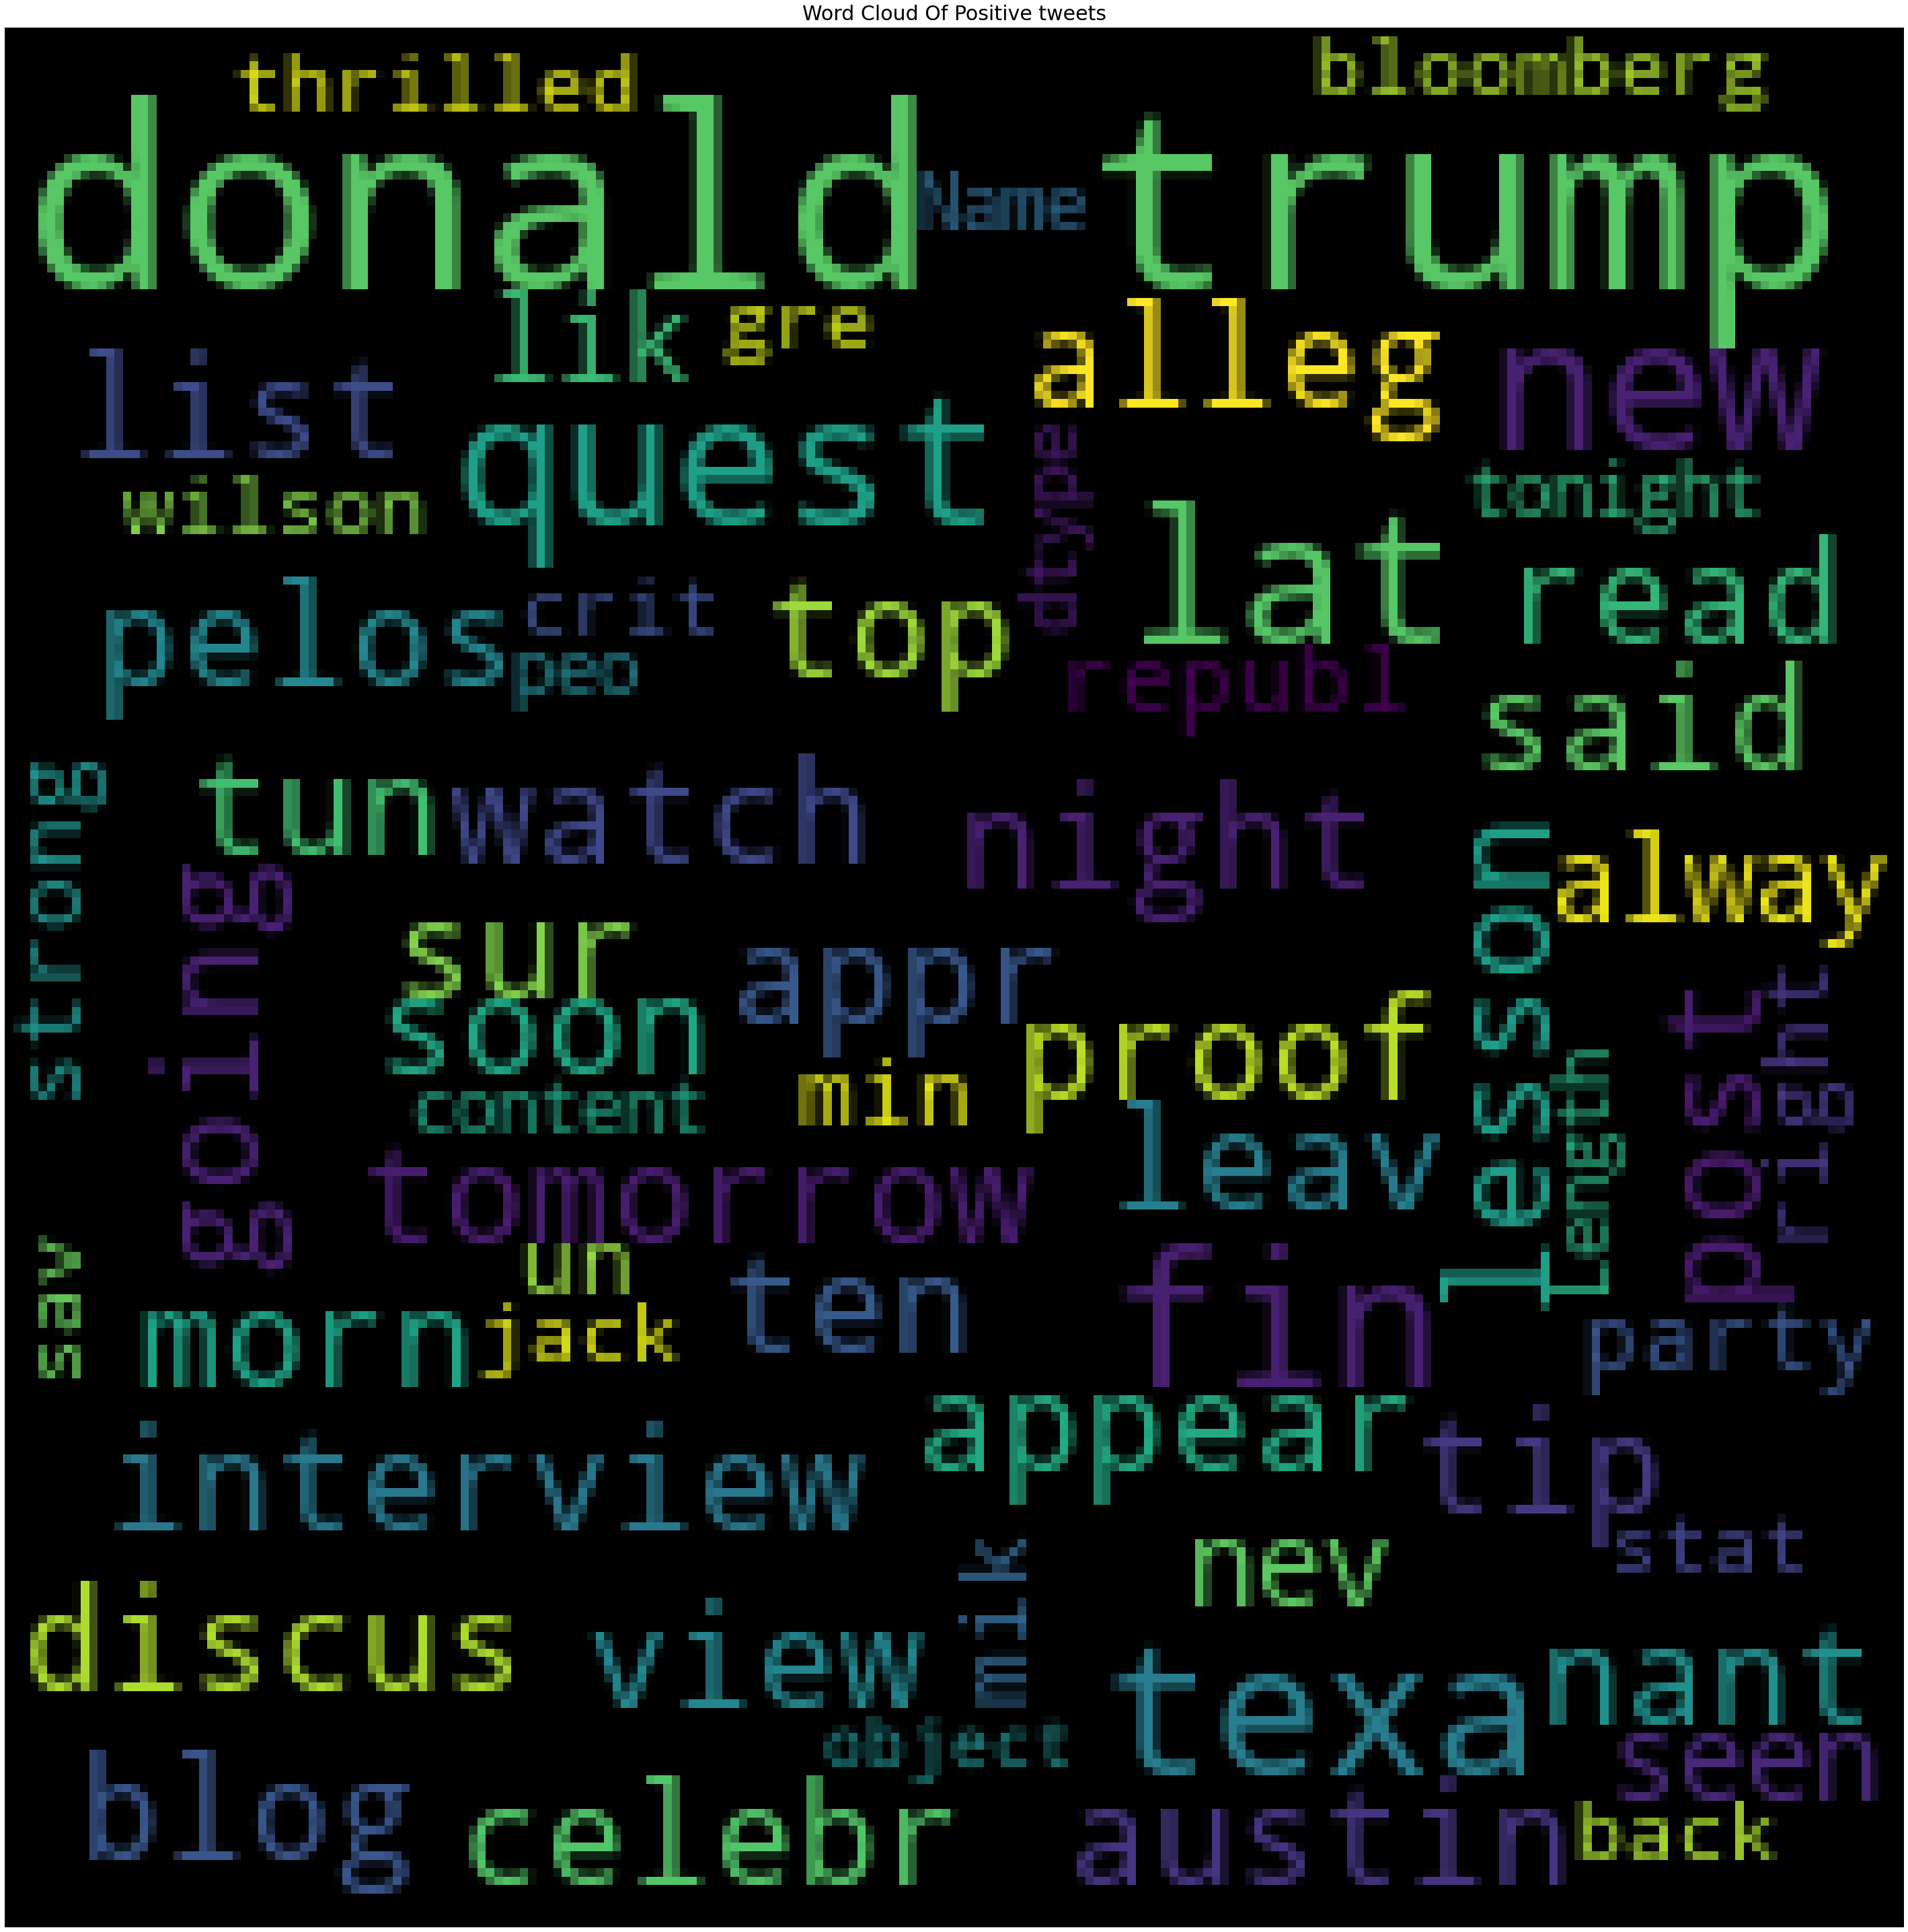

In [32]:
plot_wordcloud(Positive_sent.content,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)
plt.savefig('pos_wordcloud.png')

<div id=9.3><h2>9.3 Negative Word Cloud</h2> </div> 

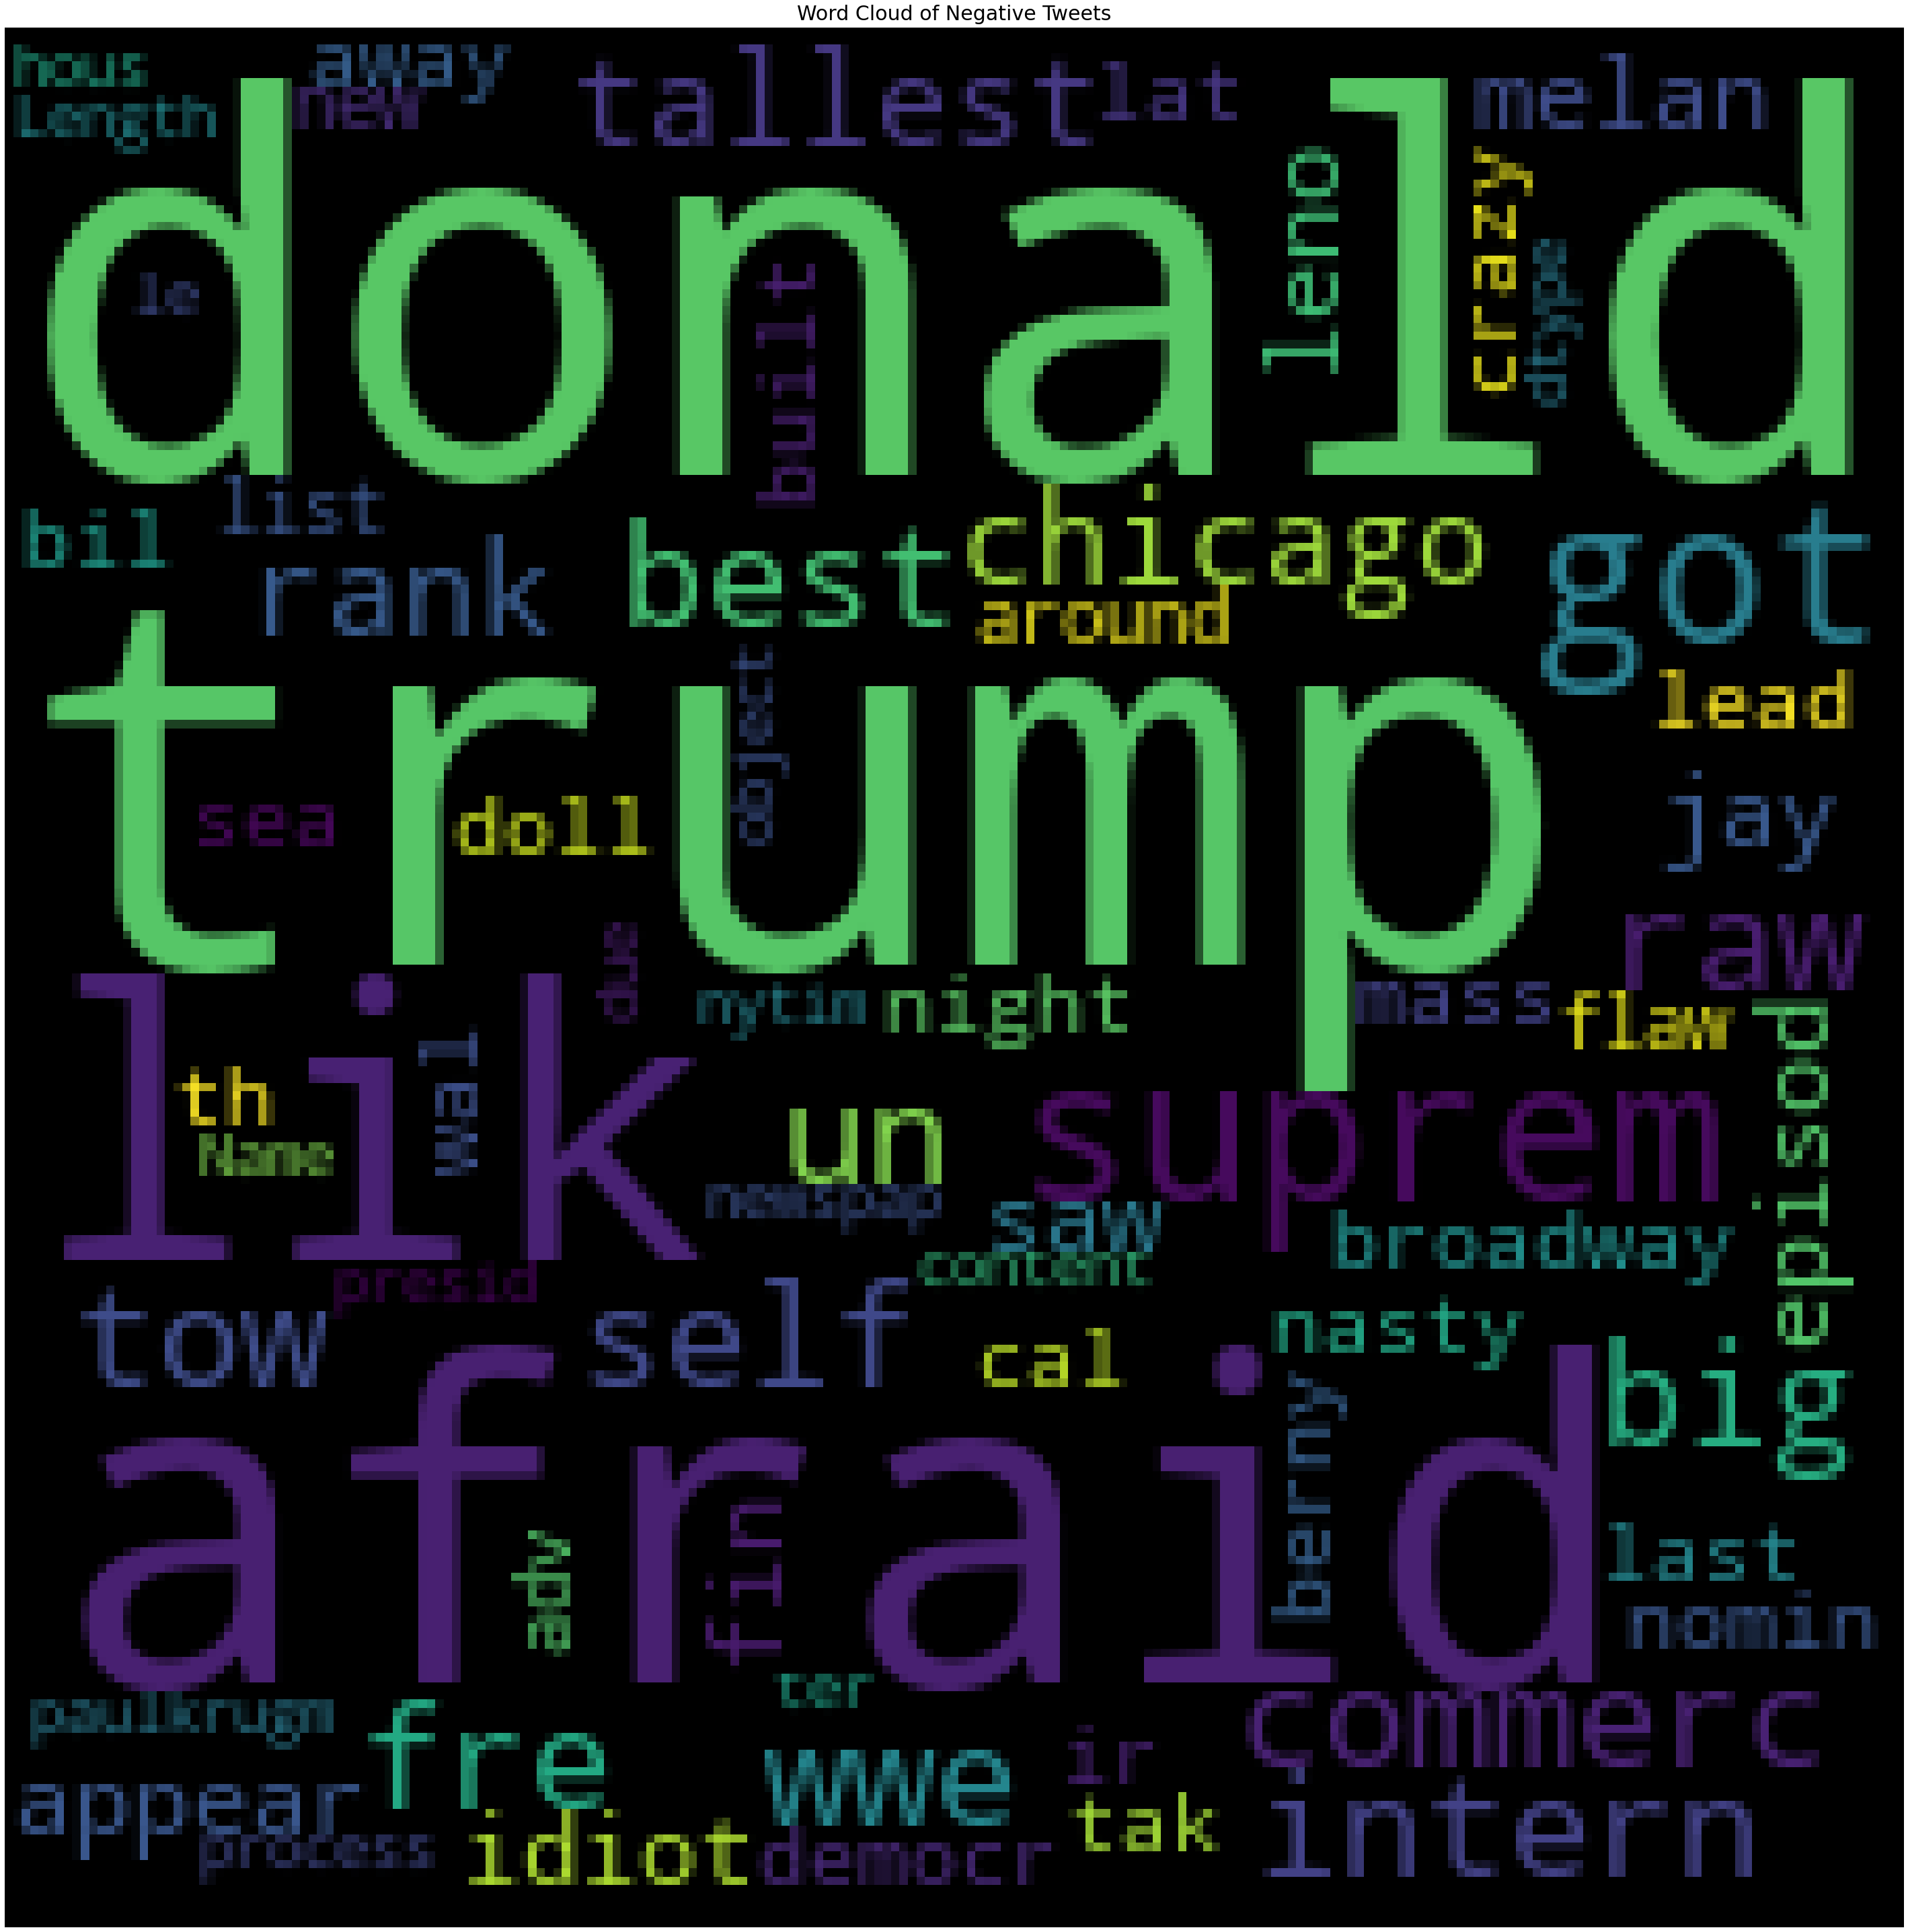

In [33]:
plot_wordcloud(Negative_sent.content,mask=pos_mask,title="Word Cloud of Negative Tweets",title_size=30)
plt.savefig('neg_wordcloud.png')